In [2]:
import pandas as pd
import numpy as np
import copy
df = pd.read_csv("data-hw3.txt", delimiter="\t")
df



,College,Win_2015,Win_2017,Rank_2015,Rank_2017
0,Alabama,12,11,2,4
1,Clemson,13,12,1,1
2,LSU,8,9,22,16
3,Michigan State,12,9,3,18
4,Northwestern,10,9,8,14
5,Notre Dame,10,9,8,14
6,Ohio State,11,11,7,5
7,Oklahoma,11,12,4,2
8,Oklahoma State,10,9,13,17
9,Stanford,11,9,5,15


In [3]:
objects = []
instances = []
for instance in df.to_numpy():
    #get data obects
    objects.append(instance[0])

    #get data obects's values
    featureValues = list(instance[1:])
    
    instances.append(featureValues)
nInstances = len(instances)
print("Number of instances:", nInstances)
objects

Number of instances: 12


['Alabama',
 'Clemson',
 'LSU',
 'Michigan State',
 'Northwestern',
 'Notre Dame',
 'Ohio State',
 'Oklahoma',
 'Oklahoma State',
 'Stanford',
 'TCU',
 'Wisconsin']

In [4]:
# converting type(instances) from list to array
X = np.array(instances)
X


array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

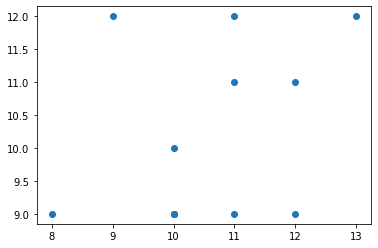

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

In [6]:
## Q1-1 TODO: K Means clustering (K = 2, Euclidean distance)
from scipy.spatial import distance as dis

centroids1 = [ 7.0, 7.0]
centroids2 = [14.0,14.0]
zeros      = [ 0.0, 0.0]

centroids=[]
centroids.append(centroids1)
centroids.append(centroids2)
centroids = np.array(centroids)

old_centroids=[]
old_centroids.append(zeros)
old_centroids.append(zeros)
old_centroids = np.array(old_centroids)

## data processing
data = []
data.append(X[:,0])
data.append(X[:,1])
X1 = np.transpose(data)

label1 = [np.zeros_like(i).tolist() for i in range(len(X1))]

while np.all(centroids != old_centroids):

    old_centroids = copy.deepcopy(centroids)
    X1a=[]
    X1b=[]    

    ## calculate the euclidean distance
    for i in range(len(X1)):
        X1a.append(dis.euclidean(X1[i],centroids1))
        X1b.append(dis.euclidean(X1[i],centroids2))

    ## creating the labels
    for i in range(len(X1)):
        if X1a[i] <= X1b[i]:
             label1[i] = 1
        else: 
            label1[i] = 0

    ## updating the new centroids' values
    sumA = sumB = A = B = 0
    for i in range(len(label1)):
        if label1[i] == 0:
            sumA = sumA + X1[i]
            A    = A    + 1

        elif label1[i] == 1:
            sumB = sumB + X1[i]
            B    = B    + 1

    centroids[0] = (sumA/A)
    centroids[1] = (sumB/B)  
print(centroids)

[[11.75 11.5 ]
 [10.    9.5 ]]


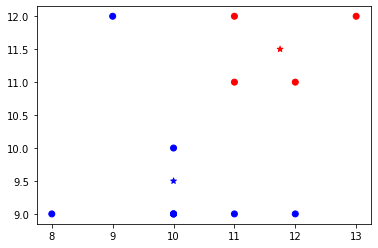

In [7]:
## TODO: Visualization
colors = ['red','blue']
plt.scatter(X1[:,0], X1[:,1], color=[colors[x] for x in label1])
plt.scatter(centroids[:,0], centroids[:,1], color=colors, marker='*')

In [8]:
## Q1-2 TODO: K Means clustering (K = 2, Euclidean distance)
from scipy.spatial import distance as dis

centroids1 = [ 7.0, 7.0]
centroids2 = [ 7.0,14.0]
zeros      = [ 0.0, 0.0]

centroids=[]
centroids.append(centroids1)
centroids.append(centroids2)
centroids = np.array(centroids)

old_centroids=[]
old_centroids.append(zeros)
old_centroids.append(zeros)
old_centroids = np.array(old_centroids)

## data processing
data = []
data.append(X[:,0])
data.append(X[:,1])
X1 = np.transpose(data)

label1 = [np.zeros_like(i).tolist() for i in range(len(X1))]

while np.all(centroids != old_centroids):

    old_centroids = copy.deepcopy(centroids)
    X1a=[]
    X1b=[]    

    ## calculate the euclidean distance
    for i in range(len(X1)):
        X1a.append(dis.euclidean(X1[i],centroids1))
        X1b.append(dis.euclidean(X1[i],centroids2))

    ## creating the labels
    for i in range(len(X1)):
        if X1a[i] <= X1b[i]:
            label1[i] = 1
        else: 
            label1[i] = 0

    ## updating the new centroids' values
    sumA = sumB = A = B = 0
    for i in range(len(label1)):
        if label1[i] == 0:
            sumA = sumA + X1[i]
            A    = A    + 1

        elif label1[i] == 1:
            sumB = sumB + X1[i]
            B    = B    + 1

    centroids[0] = (sumA/A)
    centroids[1] = (sumB/B)  
print(centroids)

[[11.2        11.6       ]
 [10.14285714  9.14285714]]


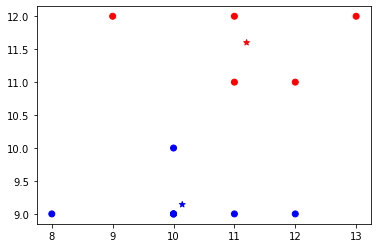

In [9]:
## TODO: Visualization
colors = ['red','blue']
plt.scatter(X1[:,0], X1[:,1], color=[colors[x] for x in label1])
plt.scatter(centroids[:,0], centroids[:,1], color=colors, marker='*')

In [30]:
## Q2 TODO: K Means clustering (K = 2, Manhattan distance)

## picking initial centroids
centroids1 = [ 1.0, 1.0]
centroids2 = [25.0,25.0]

centroids=[]
centroids.append(centroids1)
centroids.append(centroids2)
centroids = np.array(centroids)

## data processing
data = []
data.append(X[:,2])
data.append(X[:,3])
X2 = np.transpose(data)

label2 = [np.zeros_like(i).tolist() for i in range(len(X2))]
old_label2 = [np.ones_like(i).tolist() for i in range(len(X2))]

while np.all(old_label2 != label2):
    
    old_label2 = copy.deepcopy(label2)
    
    X2a=[]
    X2b=[]    
    
    X2a = X2 - centroids1
    X2b = X2 - centroids2

    ## calculate the manhattan distance
    X2a_manh = abs(X2a[:,0]) + abs(X2a[:,1])
    X2b_manh = abs(X2b[:,0]) + abs(X2b[:,1])

    ## creating the labels    
    for i in range(len(X2)):
        if X2a_manh[i] < X2b_manh[i]:
            label2[i] = 1
        else: 
            label2[i] = 0

    ## creating the new centroids' values
    sumA = sumB = A = B = 0.0
    for i in range(len(label2)):
        if label2[i] == 0:
            sumA = sumA + X2[i]
            A    = A    + 1.0

        elif label2[i] == 1:
            sumB = sumB + X2[i]
            B    = B    + 1.0
    
    if A !=0:centroids[0] = (sumA/A)
    if B !=0:centroids[1] = (sumB/B)



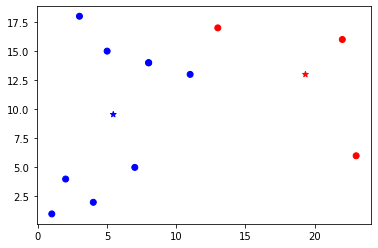

In [31]:
## TODO: Visualization (2 clusters)
colors = ['red','blue']
plt.scatter(X2[:,0], X2[:,1], color=[colors[x] for x in label2])
plt.scatter(centroids[:,0], centroids[:,1], color=colors, marker='*')

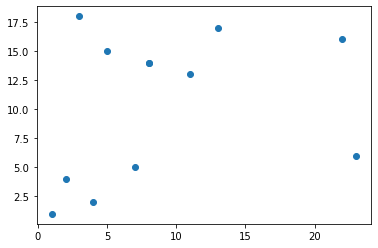

In [32]:
plt.scatter(X[:,2], X[:,3])

In [33]:
## Q3 TODO: K Means clustering (K = 3, Manhattan distance)

## picking initial centroids
centroids1 = [ 4.0,  4.0]
centroids2 = [ 9.0, 16.0]
centroids3 = [23.0, 12.0]
zeros      = [ 0.0,  0.0]

centroids=[]
centroids.append(centroids1)
centroids.append(centroids2)
centroids.append(centroids3)
centroids = np.array(centroids)

old_centroids=[]
old_centroids.append(zeros)
old_centroids.append(zeros)
old_centroids.append(zeros)
old_centroids = np.array(old_centroids)


## data processing
data = []
data.append(X[:,2])
data.append(X[:,3])
X3 = np.transpose(data)
label3 = [np.zeros_like(i).tolist() for i in range(len(X3))]

while np.all(centroids != old_centroids):
    
    old_centroids = centroids

    X3a = []
    X3b = []    
    X3c = []

    X3a = X3-centroids1
    X3b = X3-centroids2
    X3c = X3-centroids3
    

    ## calculate the manhattan distance
    X3a_manh = abs(X3a[:,0])+abs(X3a[:,1])
    X3b_manh = abs(X3b[:,0])+abs(X3b[:,1])
    X3c_manh = abs(X3c[:,0])+abs(X3c[:,1])

    ## creating the labels    
    for i in range(len(X1)):
        if X3a_manh[i] <= X3b_manh[i] and X3a_manh[i] <= X3c_manh[i]:
            label3[i] = 0
        elif X3b_manh[i] <= X3a_manh[i] and X3b_manh[i] <= X3c_manh[i]:
            label3[i] = 1
        elif X3c_manh[i] <= X3a_manh[i] and X3c_manh[i] <= X3b_manh[i]:
            label3[i] = 2

    ## creating the new centroids' values
    sumA = sumB = sumC = A = B = C = 0
    for i in range(len(label3)):
        if label3[i] == 0:
            sumA = sumA + X3[i]
            A    = A    + 1

        elif label3[i] == 1:
            sumB = sumB + X3[i]
            B    = B    + 1
        
        elif label3[i] == 1:
            sumC = sumC + X3[i]
            C    = C    + 1

    if A !=0:centroids[0] = (sumA/A)
    if B !=0:centroids[1] = (sumB/B)
    if C !=0:centroids[2] = (sumC/C)
print(centroids)

[[ 3.5         3.        ]
 [ 8.         15.16666667]
 [23.         12.        ]]


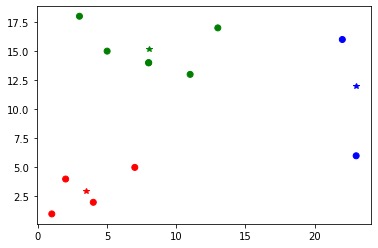

In [34]:
## TODO: Visualization (3 clusters)

colors = ['red','green','blue']
plt.scatter(X3[:,0], X3[:,1], color=[colors[x] for x in label3])
plt.plot(centroids[0][0], centroids[0][1], color = 'red', marker='*')
plt.plot(centroids[1][0], centroids[1][1], color = 'green', marker='*')
plt.plot(centroids[2][0], centroids[2][1], color = 'blue', marker='*')
# plt.scatter(centroids[:,0], centroids[:,1], color=[colors[x] for x in label3])